<a href="https://colab.research.google.com/github/Mohammed-Taasir/CSE508_Winter2023_A2_14/blob/main/A2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3) [20 points] Ranked-Information Retrieval and Evaluation

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = '/content/drive/MyDrive/Dataset/IR-assignment-2-data (2).txt'

In [29]:
file = open(path)

# Total number of files

In [30]:
rel_score_list = []
res = []

In [31]:
# only qid:4 is extracted and stores values of relevance score in rel_score_list and stores complete row in res.

for l in file:
    lines = l.split()
    if (lines[1] == 'qid:4'):
        rel_score_list.append(lines[0])
        res.append(lines)

In [32]:
# sort the result in max DCG order

res.sort(reverse = True)

In [33]:
# calculate total number of files

rel_score_count = {}
for val in rel_score_list:
    c = 0
    for lists in res:
        if (lists[0] == val):
            c = c + 1
    rel_score_count[val] = c

In [34]:
print(res)

[['3', 'qid:4', '1:3', '2:0', '3:2', '4:1', '5:3', '6:1', '7:0', '8:0.666667', '9:0.333333', '10:1', '11:344', '12:0', '13:19', '14:6', '15:369', '16:14.976692', '17:28.949002', '18:25.594644', '19:28.531344', '20:14.972391', '21:99', '22:0', '23:6', '24:1', '25:106', '26:6', '27:0', '28:0', '29:0', '30:6', '31:51', '32:0', '33:4', '34:1', '35:56', '36:33', '37:0', '38:2', '39:0.333333', '40:35.333333', '41:378', '42:0', '43:2.666667', '44:0.222222', '45:454.222222', '46:0.287791', '47:0', '48:0.315789', '49:0.166667', '50:0.287263', '51:0.017442', '52:0', '53:0', '54:0', '55:0.01626', '56:0.148256', '57:0', '58:0.210526', '59:0.166667', '60:0.151762', '61:0.09593', '62:0', '63:0.105263', '64:0.055556', '65:0.095754', '66:0.003194', '67:0', '68:0.007387', '69:0.006173', '70:0.003336', '71:381.086021', '72:0', '73:45.331988', '74:9.586712', '75:411.010633', '76:49.589179', '77:0', '78:0', '79:0', '80:49.59403', '81:281.883642', '82:0', '83:35.956938', '84:9.586712', '85:309.497726', '86

In [35]:
print(rel_score_count)

{'0': 59, '1': 26, '3': 1, '2': 17}


In [36]:
tot_files = 1
for k in rel_score_count.keys():
    tot_files = tot_files * math.factorial(rel_score_count[k])

In [37]:
print(tot_files)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


# Rearrangement of query-url pairs in order of max-DCG

In [38]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/IR-assignment-2-data (2).txt", sep = ' ', header = None)

In [39]:
df

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0,NaN
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0,NaN
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0,NaN
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0,NaN


In [40]:
df_res = df[df[1] == 'qid:4']
df_sort = df_res.sort_values(by = 0, ascending = False)
df_sort = df_sort.reset_index(drop = True)

In [41]:
df_res

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


In [42]:
df_sort

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0,NaN
99,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0,NaN
100,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0,NaN
101,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0,NaN


In [43]:
# convert dataframe to text file
df_sort.to_csv('qid:4.txt', sep='\t', index=False)

In [44]:
# convert dataframe to Excel file
df_sort.to_excel('qid:4.xlsx', index=False)

In [45]:
df_sort[0][0]

3

In [46]:
df_sort[0][1]

2

# Calculate nDCG

In [47]:
def calDCG(df, k):
    dcg_res = df[0][0]
    for i in range(2, k+1):
        dcg_res = dcg_res + (df[0][i-1]/np.log2(i))
    return dcg_res

In [48]:
print("nDCG at 50:",calDCG(df_res,50)/calDCG(df_sort,50))
print("nDCG for whole dataset:",calDCG(df_res,len(df_res))/calDCG(df_sort,len(df_res)))

nDCG at 50: 0.3521042740324887
nDCG for whole dataset: 0.5979226516897831


# Precision-Recall Graph

In [49]:
file = open(path)
rel_doc = 0
data_list = []

In [50]:
for l in file:
    lines = l.split()
    if (lines[1] == 'qid:4'):
        feature75 = lines[76].split(":")[1]
        if(lines[0] == '0'):                         # if the rel score is 0 then not counted in rel_doc
            data_list.append([0, float(feature75)])
        else:
            data_list.append([1, float(feature75)]) 
            rel_doc = rel_doc + 1                    # counted as rel_doc when rel score is not 0

In [51]:
# sort the list in the reverse order of the second element of each element of data_list to plot graph

data_list = sorted(data_list, key = lambda k:k[1], reverse = True) 
print(data_list)

[[0, 972.826451], [0, 612.893205], [0, 571.500533], [0, 538.388954], [1, 528.520116], [0, 463.099129], [1, 439.396463], [1, 411.010633], [0, 316.319283], [1, 311.705149], [0, 305.102064], [1, 296.023694], [1, 292.184568], [1, 270.13233], [1, 237.21632], [1, 237.21632], [0, 226.444023], [1, 217.848266], [0, 212.401296], [1, 202.442155], [0, 201.720933], [1, 200.840161], [0, 200.840161], [1, 198.480212], [1, 192.953467], [1, 188.936782], [0, 188.129935], [0, 187.934366], [0, 186.375414], [0, 185.617459], [0, 180.720002], [1, 180.24324], [0, 177.168378], [1, 176.875026], [0, 176.000104], [0, 169.844071], [1, 166.683125], [1, 161.455583], [0, 161.455583], [1, 161.15638], [1, 157.05992], [1, 156.301965], [0, 148.415271], [0, 148.415271], [0, 144.564444], [0, 143.769297], [1, 143.445062], [0, 142.9683], [1, 142.589323], [0, 142.589323], [1, 142.038637], [1, 140.479685], [0, 130.655061], [1, 121.96152], [1, 121.814843], [0, 121.007996], [1, 108.548081], [1, 103.400313], [0, 98.418404], [1, 98

In [52]:
c = 1                                   # no of documents retrieved till now 
precision = []
recall = []
correct_relevant = 0                    # no of relevant documents retrived till now

for i in range(len(data_list)):
    precision.append(correct_relevant/c)      # precision formula append
    recall.append(correct_relevant/ rel_doc)  # recall formula append
    l = data_list[i]
    if (l[0] == 1):                           # doc is rightly classified when the value is 1
        correct_relevant = correct_relevant + 1
    c = c + 1 

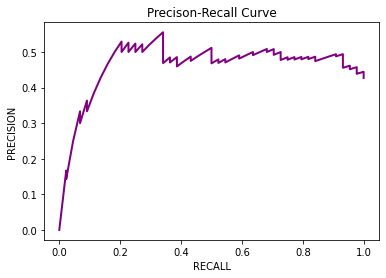

In [53]:
# Precision - Recall Graph
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title("Precison-Recall Curve")
plt.plot(recall, precision, color='purple', linewidth=2)
plt.show();